---
layout: post
title: Graph Heuristics - Intro
categories: [Java Spring]
permalink: /graphs/intro
menu: /nav/graph.html
---

## What is a graph?
- not the coordinate plane graph
- represents a network of relationships between objects

#### Components
- Nodes/Vertices
- Edges
    - Nodes are connected with edges

![alt text](/portfolio_2025/images/image.png)

#### Representating a Graph
To work with graphs, we need to represent them in code. There are three common ways to do this.

1. Node and Edge Sets
    - List of Nodes (in this case JGraphT calls them Vertices)
    - List of Edges
        - Each edge is represented by the two nodes it is connected to

2. Adjacency Matrix
    - N x N matrix, where N is the number of nodes
    - Column and Row for each node
    - 1 represents an edge between node and column of cell
    - 0 represents no connected between node and column of cell

3. Adjacency List
    - LinkedList or Dictionary (python)
    - 1 key for every node
    - Each key's value is a list of all the nodes it is connected to

In [1]:
%maven org.jgrapht:jgrapht-core:1.5.1

In [ ]:
import org.jgrapht.*;
import org.jgrapht.graph.*;
import org.jgrapht.generate.*;
import org.jgrapht.util.SupplierUtil;

import java.util.*;
import java.util.function.Supplier;

Supplier<String> vSupplier = new Supplier<>() {
    private int id = 0;
    public String get() { return "" + id++; }
};

Graph<String, DefaultEdge> g = new SimpleGraph<>(vSupplier, SupplierUtil.createDefaultEdgeSupplier(), false);

GnmRandomGraphGenerator<String, DefaultEdge> generator = new GnmRandomGraphGenerator<>(10, 15);
generator.generateGraph(g);

System.out.println("Vertices: " + g.vertexSet());
System.out.println("Edges: " + g.edgeSet());

List<String> vertices = new ArrayList<>(g.vertexSet());
Collections.sort(vertices);

System.out.println("\nAdjacency Matrix:");
System.out.print("  ");
for (String v : vertices) {
    System.out.print(v + " ");
}
System.out.println();

for (String v1 : vertices) {
    System.out.print(v1 + " ");
    for (String v2 : vertices) {
        boolean connected = g.containsEdge(v1, v2);
        System.out.print((connected ? 1 : 0) + " ");
    }
    System.out.println();
}

System.out.println("\nAdjacency List:");
for (String v : vertices) {
    Set<DefaultEdge> edges = g.edgesOf(v);
    List<String> neighbors = new ArrayList<>();
    for (DefaultEdge e : edges) {
        String src = g.getEdgeSource(e);
        String tgt = g.getEdgeTarget(e);
        if (src.equals(v)) {
            neighbors.add(tgt);
        } else {
            neighbors.add(src);
        }
    }
    Collections.sort(neighbors);
    System.out.println(v + ": " + neighbors);
}


Vertices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Edges: [(3 : 5), (8 : 7), (7 : 3), (2 : 4), (3 : 1), (0 : 1), (4 : 5), (1 : 2), (8 : 3), (6 : 3), (5 : 6), (5 : 1), (2 : 3), (4 : 0), (1 : 9)]

Adjacency Matrix:
  0 1 2 3 4 5 6 7 8 9 
0 0 1 0 0 1 0 0 0 0 0 
1 1 0 1 1 0 1 0 0 0 1 
2 0 1 0 1 1 0 0 0 0 0 
3 0 1 1 0 0 1 1 1 1 0 
4 1 0 1 0 0 1 0 0 0 0 
5 0 1 0 1 1 0 1 0 0 0 
6 0 0 0 1 0 1 0 0 0 0 
7 0 0 0 1 0 0 0 0 1 0 
8 0 0 0 1 0 0 0 1 0 0 
9 0 1 0 0 0 0 0 0 0 0 

Adjacency List:
0: [1, 4]
1: [0, 2, 3, 5, 9]
2: [1, 3, 4]
3: [1, 2, 5, 6, 7, 8]
4: [0, 2, 5]
5: [1, 3, 4, 6]
6: [3, 5]
7: [3, 8]
8: [3, 7]
9: [1]


### Popcorn Hack #1
Which of the three representations above is most efficient?
Ans) Adjacency list is most efficient because it has the best balance of space and time efficiency. Uses O(V + E) space.

## Types of Graphs
#### Weighted
In a Weighted Graph, each node is assigned a cost, a number representing cost to traverse that edge. The total cost is the sum of the costs of all nodes traveled. Weighted graphs are useful where traveling between different nodes is less or more prefereable.

#### Directed
In a directed Graph, each node can only be traveled in one direction. 


## Real Applications
1. Traveling Salesman Problem
    - Salesman must travel to every city to sell his products. He wants to do so in least possible time
    - City = Node
    - Path between Cities = Edge
    - Weighted by time it takes to travel between cities
    - Hamiltonian Path/Cycle: path must visit each node exactly once

### Homework Part 1
1. How might I represented a weighted graph? 
    - Using an Adjacency List?
       - A weighted graph can be represented by storing each vertex as a key in a dictionary (or list), and for each vertex, the value is a list of tuples. Each tuple contains a neighboring vertex and the weight of the edge connecting them.
    - Using a Vertex and Edge Set?
      - A weighted graph can also be represented using a set of vertices and a set of edges. Each edge in the edge set is stored as a tuple that includes the starting vertex, the ending vertex, and the weight of the edge.

2. How might I represented a directed graph?
    - Using an Adjacency List?
      - In a directed graph, edges have direction (from one vertex to another). You can represent this by listing each vertex with its outgoing connections. Each vertex points to a list of other vertices it has directed edges to.
    - Using a Vertex and Edge Set?
      - A directed graph can also be represented with a set of vertices and a set of directed edges. Each edge is an ordered pair indicating the direction from the first vertex to the second.

3. Represent the following graph using an adjacency matrix

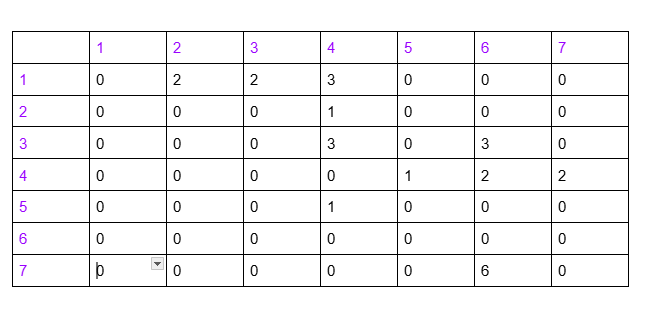